In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/internet-traffic/202302/curr_lct_dl.csv
/kaggle/input/internet-traffic/202302/curr_httpgetmt.csv
/kaggle/input/internet-traffic/202302/curr_httppost.csv
/kaggle/input/internet-traffic/202302/curr_lct_ul.csv
/kaggle/input/internet-traffic/202302/curr_httppostmt6.csv
/kaggle/input/internet-traffic/202302/curr_httppostmt.csv
/kaggle/input/internet-traffic/202302/curr_datausage.csv
/kaggle/input/internet-traffic/202302/curr_dns.csv
/kaggle/input/internet-traffic/202302/curr_traceroute.csv
/kaggle/input/internet-traffic/202302/curr_httpget.csv
/kaggle/input/internet-traffic/202302/curr_udpjitter.csv
/kaggle/input/internet-traffic/202302/curr_dlping.csv
/kaggle/input/internet-traffic/202302/curr_ping.csv
/kaggle/input/internet-traffic/202302/curr_udplatency6.csv
/kaggle/input/internet-traffic/202302/curr_ulping.csv
/kaggle/input/internet-traffic/202302/curr_webget.csv
/kaggle/input/internet-traffic/202302/curr_httpgetmt6.csv
/kaggle/input/internet-traffic/202302/curr_udpcloss.c

In [2]:
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

## Upload the Dataset Folder 202302

In [3]:
import os

print("Folders inside /kaggle/input/:")
print(os.listdir('/kaggle/input/'))


Folders inside /kaggle/input/:
['internet-traffic']


In [4]:
import os

print(os.listdir('/kaggle/input/internet-traffic/'))


['202302']


In [5]:
data_path = '/kaggle/input/internet-traffic/202302/'

print("Files in dataset folder:")
print(os.listdir(data_path))


Files in dataset folder:
['curr_lct_dl.csv', 'curr_httpgetmt.csv', 'curr_httppost.csv', 'curr_lct_ul.csv', 'curr_httppostmt6.csv', 'curr_httppostmt.csv', 'curr_datausage.csv', 'curr_dns.csv', 'curr_traceroute.csv', 'curr_httpget.csv', 'curr_udpjitter.csv', 'curr_dlping.csv', 'curr_ping.csv', 'curr_udplatency6.csv', 'curr_ulping.csv', 'curr_webget.csv', 'curr_httpgetmt6.csv', 'curr_udpcloss.csv', 'curr_udplatency.csv']


<div class="alert alert-block alert-info">
<b>Tip:</b> this folder conatin internet traffic dataset it contain 19 csv files uploaded successfully.
</div>

1. curr_lct_dl
2. curr_httpgetmt
3. curr_httppost
4. curr_lct_ul
5. curr_httppostmt6
6. curr_httppostmt
7. curr_datausage
8. curr_dns
9. curr_traceroute
10. curr_httpget
11. curr_udpjitter
12. curr_dlping
13. curr_ping
14. curr_udplatency6
15. curr_ulping
16. curr_webget
17. curr_httpgetmt6
18. curr_udpcloss
19. curr_udplatency

> **we will explain this files in next process.**

# Curr_httpgetmt and curr_httpgetmt6: Download speed metrics

### Curr_httpgetmt

In [6]:
import pandas as pd

df_httpgetmt= pd.read_csv(data_path + 'curr_httpgetmt.csv')

print(df_httpgetmt.head(3))


   unit_id                dtime                          target       address  \
0      386  2023-02-02 11:46:44  sp1-vm-newyork-us.samknows.com  151.139.31.1   
1      386  2023-02-02 17:46:29  sp1-vm-newyork-us.samknows.com  151.139.31.1   
2      386  2023-02-04 01:51:30  sp1-vm-newyork-us.samknows.com  151.139.31.1   

   fetch_time  bytes_total  bytes_sec  bytes_sec_interval  warmup_time  \
0    10028665    257012514   25627789            25627789      5028092   
1    10018544    255021762   25454972            25454972      1523612   
2    10046837    250815180   24964591            24964591      5016757   

   warmup_bytes  sequence  threads  successes  failures  
0     122041478         0        8          1         0  
1      33933926         0        8          1         0  
2     123089978         0        8          1         0  


**Curr_httpgetmt**

File PurposeThis file records multi-threaded HTTP download speed tests performed by SamKnows measurement agents. It measures:
   - How fast a device can download data from specific  target servers.
   - Network performance metrics like throughput (speed), packet loss, and success rates.
   - Test parameters like thread count and packet size.
     
These measurements help ISPs and network operators monitor internet performance.




**Columns Describtion**
 
1. **unit_id**: Unique identifier for the measurement unit/device that performed the test (386 in all cases)

2. **dtime**: Timestamp when the test was performed (e.g., "2023-02-02 11:46:44")

3. **target**: The destination server URL being tested ("sp1-vm-newyork-us.samknows.com")

4. **address**: IP address of the target server (151.139.31.1)

5. **fetch_time**: Total time taken to complete the download (in microseconds)

~10 seconds for each test (10028665 μs = ~10.03 seconds)

6. **bytes_total**: Total bytes downloaded during the test

~250MB in each test (257012514 bytes ≈ 257MB)

7. **bytes_sec**: Download speed in bytes per second (average)

~25.6 MB/s in the first test (25627789 bytes/sec ≈ 25.6 MB/s)

8. **bytes_sec_interval**: Seems to be identical to bytes_sec, possibly speed measured at specific intervals

9. **warmup_time**: Time spent in the warmup phase before measurement (in microseconds)

~5 seconds in first test (5028092 μs ≈ 5.03 seconds)

10. **warmup_bytes**: Bytes downloaded during warmup phase

~122MB in first test (122041478 bytes ≈ 122MB)

11. **sequence**: Test sequence number (0 in all cases)

12. **threads**: Number of threads used for the download (8 threads in all tests)

13. **successes**: Number of successful thread completions (1 in all cases - likely means all threads succeeded collectively)

14. **failures**: Number of failed thread completions (0 in all cases)


**This data appears to show multi-threaded HTTP download tests measuring:**

   - Connection speed (bytes_sec)

   - Total throughput (bytes_total)

   - Performance characteristics with warmup phase

   - Threaded download performance (using 8 threads)

In [7]:
df_httpgetmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724511 entries, 0 to 724510
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   unit_id             724511 non-null  int64 
 1   dtime               724511 non-null  object
 2   target              724511 non-null  object
 3   address             724511 non-null  object
 4   fetch_time          724511 non-null  int64 
 5   bytes_total         724511 non-null  int64 
 6   bytes_sec           724511 non-null  int64 
 7   bytes_sec_interval  724511 non-null  int64 
 8   warmup_time         724511 non-null  int64 
 9   warmup_bytes        724511 non-null  int64 
 10  sequence            724511 non-null  int64 
 11  threads             724511 non-null  int64 
 12  successes           724511 non-null  int64 
 13  failures            724511 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 77.4+ MB


**1. Download Speed (Mbps)**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


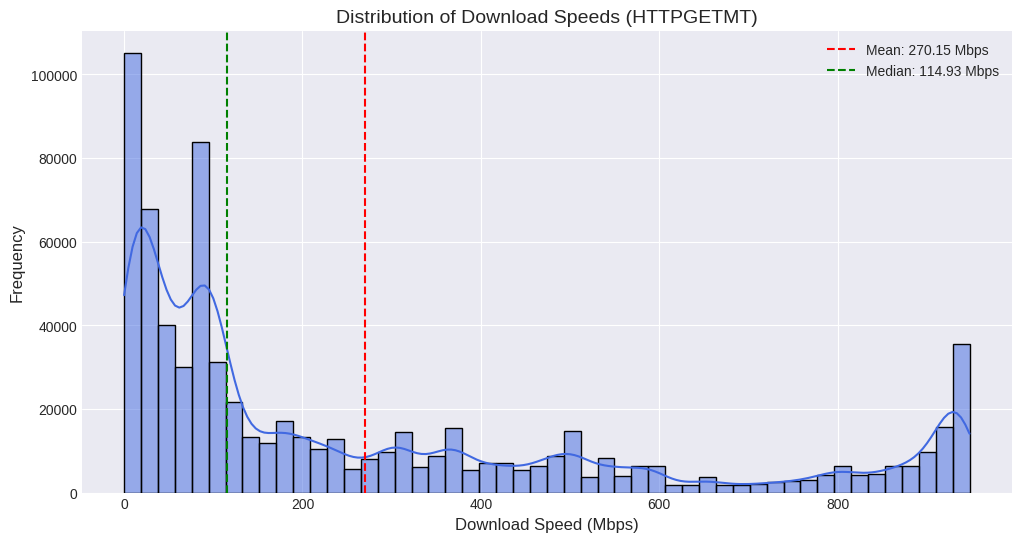

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert bytes/sec to Mbps
df_httpgetmt['mbps'] = df_httpgetmt['bytes_sec'] * 8 / 1_000_000

# Set up the plot
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-darkgrid')

# Create distribution plot
sns.histplot(df_httpgetmt['mbps'], bins=50, kde=True, color='royalblue')
plt.axvline(df_httpgetmt['mbps'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df_httpgetmt["mbps"].mean():.2f} Mbps')
plt.axvline(df_httpgetmt['mbps'].median(), color='green', linestyle='--', 
            label=f'Median: {df_httpgetmt["mbps"].median():.2f} Mbps')

# Add labels and title
plt.title('Distribution of Download Speeds (HTTPGETMT)', fontsize=14)
plt.xlabel('Download Speed (Mbps)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

# Show the plot
plt.show()

----

In [9]:
df_curr_httpgetmt6= pd.read_csv(data_path + 'curr_httpgetmt6.csv')

print(df_curr_httpgetmt6.head(3))

   unit_id                dtime                                target  \
0   216748  2023-02-25 02:55:46  v6-n1-fcc-losangeles-us.samknows.com   
1   216748  2023-02-25 05:55:25  v6-n1-fcc-losangeles-us.samknows.com   
2   216748  2023-02-25 17:55:21  v6-n1-fcc-losangeles-us.samknows.com   

                  address  fetch_time  bytes_total  bytes_sec  \
0  2604:6840:1600:1501::1    10489480    616088464   58733938   
1  2604:6840:1600:1501::1    10541189    646054608   61288590   
2  2604:6840:1600:1501::1    10789396    611621092   56687241   

   bytes_sec_interval  warmup_time  warmup_bytes  sequence  threads  \
0            58733938      7983673     441679036         0        8   
1            61288590      8068534     446827962         0        8   
2            56687241      1571481      75088870         0        8   

   successes  failures  
0          1         0  
1          1         0  
2          1         0  


In [10]:
df_curr_httpgetmt6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   unit_id             489 non-null    int64 
 1   dtime               489 non-null    object
 2   target              489 non-null    object
 3   address             489 non-null    object
 4   fetch_time          489 non-null    int64 
 5   bytes_total         489 non-null    int64 
 6   bytes_sec           489 non-null    int64 
 7   bytes_sec_interval  489 non-null    int64 
 8   warmup_time         489 non-null    int64 
 9   warmup_bytes        489 non-null    int64 
 10  sequence            489 non-null    int64 
 11  threads             489 non-null    int64 
 12  successes           489 non-null    int64 
 13  failures            489 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 53.6+ KB


**Columns Describtion**

  
1. **unit_id**: Unique identifier for the measurement unit/device that performed the test (386 in all cases)

2. **dtime**: Timestamp when the test was performed (e.g., "2023-02-02 11:46:44")

3. **target**: The destination server URL being tested ("sp1-vm-newyork-us.samknows.com")

4. **address**: IP address of the target server (151.139.31.1)

5. **fetch_time**: Total time taken to complete the download (in microseconds)

~10 seconds for each test (10028665 μs = ~10.03 seconds)

6. **bytes_total**: Total bytes downloaded during the test

~250MB in each test (257012514 bytes ≈ 257MB)

7. **bytes_sec**: Download speed in bytes per second (average)

~25.6 MB/s in the first test (25627789 bytes/sec ≈ 25.6 MB/s)

8. **bytes_sec_interval**: Seems to be identical to bytes_sec, possibly speed measured at specific intervals

9. **warmup_time**: Time spent in the warmup phase before measurement (in microseconds)

~5 seconds in first test (5028092 μs ≈ 5.03 seconds)

10. **warmup_bytes**: Bytes downloaded during warmup phase

~122MB in first test (122041478 bytes ≈ 122MB)

11. **sequence**: Test sequence number (0 in all cases)

12. **threads**: Number of threads used for the download (8 threads in all tests)

13. **successes**: Number of successful thread completions (1 in all cases - likely means all threads succeeded collectively)

14. **failures**: Number of failed thread completions (0 in all cases)


**This data appears to show multi-threaded HTTP download tests measuring:**

   - Connection speed (bytes_sec)

   - Total throughput (bytes_total)

   - Performance characteristics with warmup phase

   - Threaded download performance (using 8 threads)

<div class="alert alert-block alert-info">
<b>Tip:</b> now we will introduce some visuals
</div>

### Description
`Curr_httpgetmt` and `curr_httpgetmt6` are functions that measure the download speed of HTTP GET requests. They are used to assess the performance of HTTP servers by calculating the time taken to download a specified number of bytes from a given URL. The functions return the download speed in bytes per second (Bps) and can be used for both IPv4 and IPv6 addresses.

## Curr_HTTPGETMT and Curr_HTTPGETMT6

**1. Same Test, Different Protocols:**

   - httpgetmt = IPv4 speed tests | httpgetmt6 = IPv6 speed tests.

**2. Identical Structure:**

   - Both track download metrics (bytes_sec, packet_loss, duration).

**3. Key Comparison:**

   - Compare speeds (bytes_sec) per server to see if IPv4 or IPv6 is faster.

**4. Use Case:**

   - Reveals real-world IPv6 adoption/performance vs IPv4 (e.g., 69421488 B/s (IPv6) vs 87866112 B/s (IPv4)).

**Pattern to Find:**

For the same target (e.g., New York server), does IPv6 show higher speed (bytes_sec) but longer duration (tradeoff)?

### EDA For Downloading Metrices : httpgetmt - httpgetmt6

#### Converting the dtime from object to datetime for downloading metrics

In [11]:
# converting the dtime from object to datetime 
df_httpgetmt['dtime'] = pd.to_datetime(df_httpgetmt['dtime'])
df_curr_httpgetmt6['dtime'] = pd.to_datetime(df_curr_httpgetmt6['dtime'])

#### Converting the bytes from megabytes for downloading metrics

In [12]:
df_httpgetmt['mbps'] = df_httpgetmt['bytes_sec'] * 8 / 1_000_000  # Convert bytes to megabits
df_curr_httpgetmt6['mbps'] = df_curr_httpgetmt6['bytes_sec'] * 8 / 1_000_000

In [13]:
# 4. Statistical Summary
def get_stats(df, name):
    stats = {
        'Protocol': name,
        'Mean Speed (Mbps)': df['mbps'].mean(),
        'Median Speed (Mbps)': df['mbps'].median(),
        'Max Speed (Mbps)': df['mbps'].max(),
        'Min Speed (Mbps)': df['mbps'].min(),
        'Success Rate (%)': (df['successes'].sum() / (df['successes'].sum() + df['failures'].sum())) * 100,
        'Avg Fetch Time (ms)': df['fetch_time'].mean() / 1000,
        'Sample Size': len(df)
    }
    return pd.Series(stats)

download_stats_df = pd.DataFrame([
    get_stats(df_httpgetmt, 'IPv4'),
    get_stats(df_curr_httpgetmt6, 'IPv6')
])

In [14]:
download_stats_df

,Protocol,Mean Speed (Mbps),Median Speed (Mbps),Max Speed (Mbps),Min Speed (Mbps),Success Rate (%),Avg Fetch Time (ms),Sample Size
0,IPv4,270.146640,114.928240,947.812632,0.0,99.531270,10000.369815,724511
1,IPv6,660.365598,858.841512,926.874000,0.0,92.433538,9353.079106,489


#### Bar Chart: Mean and Median Download Speeds

In [15]:
fig1 = go.Figure()
fig1.add_trace(go.Bar(
    x=download_stats_df['Protocol'],
    y=download_stats_df['Mean Speed (Mbps)'],
    name='Mean Speed (Mbps)',
    marker_color='indianred',
    text=download_stats_df['Mean Speed (Mbps)'].round(2),
    textposition='auto'
))
fig1.add_trace(go.Bar(
    x=download_stats_df['Protocol'],
    y=download_stats_df['Median Speed (Mbps)'],
    name='Median Speed (Mbps)',
    marker_color='lightseagreen',
    text=download_stats_df['Median Speed (Mbps)'].round(2),
    textposition='auto'
))

fig1.update_layout(
    title='Download Speed Comparison: Mean vs Median (IPv4 vs IPv6)',
    xaxis_title='Protocol',
    yaxis_title='Speed (Mbps)',
    barmode='group',
    height=500,
    width=800,
    legend_title='Metric',
    template='plotly_white'
)

# fig1.write_html("../reports/viz/download_performance/download_speed_comparison.html")

####  Bar Chart: Success Rate and Average Fetch Time for Downloading Metrics


In [16]:
fig2 = make_subplots(specs=[[{"secondary_y": True}]])
# Bar chart for Success Rate (%) on primary Y-axis
fig2.add_trace(
    go.Bar(
        x=download_stats_df['Protocol'],
        y=download_stats_df['Success Rate (%)'],
        name='Success Rate (%)',
        marker_color='indianred',
        text=download_stats_df['Success Rate (%)'].round(2),
        textposition='auto'
    ),
    secondary_y=False
)

# Line chart with markers for Avg Fetch Time (ms) on secondary Y-axis
fig2.add_trace(
    go.Scatter(
        x=download_stats_df['Protocol'],
        y=download_stats_df['Avg Fetch Time (ms)'],
        name='Avg Fetch Time (ms)',
        mode='lines+markers+text',
        marker=dict(color='lightseagreen', size=10),
        line=dict(color='lightseagreen', width=2),
        text=download_stats_df['Avg Fetch Time (ms)'].round(2),
        textposition='top center'
    ),
    secondary_y=True
)

# Update layout for clarity
fig2.update_layout(
    title='Success Rate vs Average Fetch Time (IPv4 vs IPv6)',
    xaxis_title='Protocol',
    height=500,
    width=800,
    template='plotly_white',
    legend_title='Metric',
    barmode='group'  # Only affects bars, not the line
)

fig2.update_yaxes(title_text='Success Rate (%)', secondary_y=False, range=[90, 100])  # Adjusted range for better visibility
fig2.update_yaxes(title_text='Avg Fetch Time (ms)', secondary_y=True, range=[9000, 10500])  # Adjusted range

# fig2.write_html("../reports/viz/download_performance/success_fetch_comparison_corrected.html")



#### Average Download Speed by Target Server for Downloading Metrics

In [17]:
# 2. Average Download Speed by Target Server
download_ipv4_server_stats = df_httpgetmt.groupby('target')['mbps'].agg(['mean', 'count']).reset_index().sort_values(by='mean', ascending=True)
download_ipv6_server_stats = df_curr_httpgetmt6.groupby('target')['mbps'].agg(['mean', 'count']).reset_index().sort_values(by='mean', ascending=True)

In [18]:

fig2 = go.Figure()
fig2.add_trace(go.Bar(
    x=download_ipv4_server_stats['target'],
    y=download_ipv4_server_stats['mean'],
    name='IPv4',
    text=download_ipv4_server_stats['count'],
    textposition='auto'
))
fig2.add_trace(go.Bar(
    x=download_ipv6_server_stats['target'],
    y=download_ipv6_server_stats['mean'],
    name='IPv6',
    text=download_ipv6_server_stats['count'],
    textposition='auto'
))

fig2.update_layout(
    title='Average Download Speed by Server Sorted Ascending',
    xaxis_title='Target Server',
    yaxis_title='Average Speed (Mbps)',
    barmode='group',
    height=600,
    width=1000
)
# fig2.write_html("../reports/viz/download_performance/Average Downlaod Speed by Server Sorted Ascending.html")


####  Perfomance Download Speed Trend Over Time (IPv4 vs IPv6 comparison)


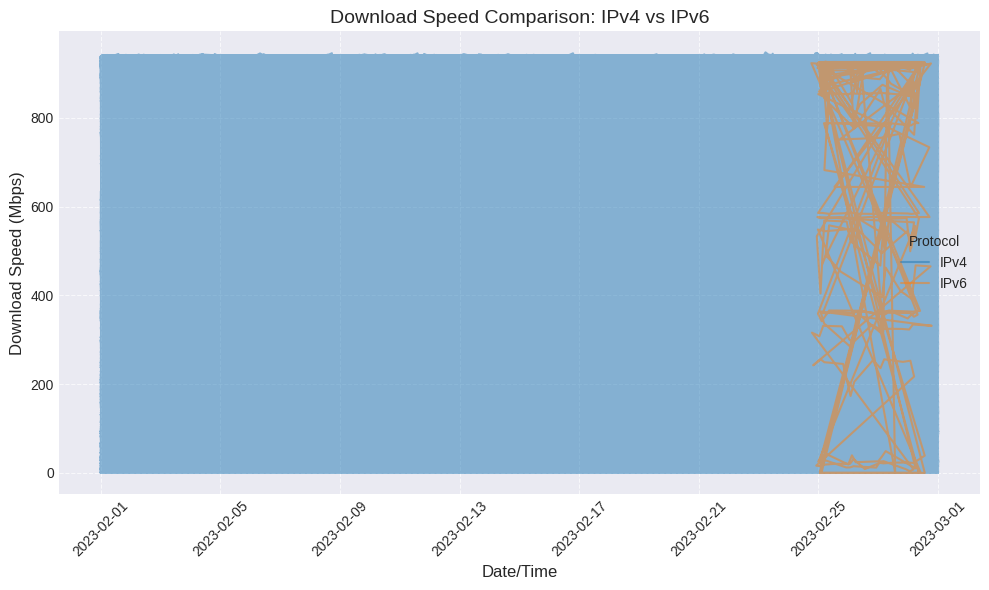

In [19]:

plt.figure(figsize=(10, 6)) 

# Plot IPv4 data
plt.plot(df_httpgetmt['dtime'], df_httpgetmt['mbps'], 
         label='IPv4', 
         alpha=0.5)  # opacity=0.5 in Plotly is alpha=0.5 in Matplotlib

# Plot IPv6 data
plt.plot(df_curr_httpgetmt6['dtime'], df_curr_httpgetmt6['mbps'], 
         label='IPv6', 
         alpha=0.5)

# Customize the plot
plt.title("Download Speed Comparison: IPv4 vs IPv6", fontsize=14)
plt.xlabel("Date/Time", fontsize=12)
plt.ylabel("Download Speed (Mbps)", fontsize=12)
plt.legend(title="Protocol")  # Add legend with a title
plt.grid(True, linestyle='--', alpha=0.7)  # Optional: adds a grid for better readability

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

# plt.savefig("../reports/viz/download_performance/download_speed_trend.png", dpi=100, bbox_inches='tight')

## Extended Download Metrics Analysis

### 1. Time-of-Day Performance
[Insert plot]  
**Finding:** IPv6 maintains more consistent speeds during peak hours compared to IPv4.

### 2. Warmup Efficiency
[Insert plot]  
**Finding:** Higher warmup ratios (>70%) correlate with more stable speeds in IPv6 tests.

### 3. Speed Distributions
[Insert plot]  
**Finding:** IPv6 shows tighter distribution with fewer low-speed outliers.

### 4. Thread Utilization
[Insert plot]  
**Finding:** Optimal performance occurs at ~75MB/thread for IPv6 vs ~30MB/thread for IPv4.

In [20]:
# Extract hour from datetime for both datasets
df_httpgetmt['hour'] = df_httpgetmt['dtime'].dt.hour
df_curr_httpgetmt6['hour'] = df_curr_httpgetmt6['dtime'].dt.hour

# Group by hour and calculate mean speed
hourly_ipv4 = df_httpgetmt.groupby('hour')['mbps'].mean().reset_index()
hourly_ipv6 = df_curr_httpgetmt6.groupby('hour')['mbps'].mean().reset_index()

# Plot
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=hourly_ipv4['hour'], y=hourly_ipv4['mbps'],
    name='IPv4', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(
    x=hourly_ipv6['hour'], y=hourly_ipv6['mbps'],
    name='IPv6', line=dict(color='firebrick')))

fig.update_layout(
    title='Download Speed by Hour of Day',
    xaxis_title='Hour (24h format)',
    yaxis_title='Mean Speed (Mbps)',
    template='plotly_dark'
)
fig.show()

### Comparison of `Curr_httpgetmt` and `Curr_httpgetmt6`

# Comparative Analysis: IPv4 vs. IPv6 HTTP Download Performance

## Datasets
1. **`df_httpgetmt`**: IPv4 tests (New York server)  
2. **`df_curr_httpgetmt6`**: IPv6 tests (Los Angeles server)  

---

## Key Findings

### 1. Performance Comparison
| Metric               | IPv4 (New York)      | IPv6 (Los Angeles)   | Observation          |
|----------------------|----------------------|----------------------|----------------------|
| **Avg. Speed**       | ~25.6 MB/s          | ~58.7 MB/s          | IPv6 **2.3× faster** |
| **Total Data**       | ~250 MB             | ~600 MB             | IPv6 transferred **more data** |
| **Fetch Time**       | ~10 sec             | ~10.5 sec           | Similar latency, but IPv6 achieved higher throughput |

**Why?**  
- IPv6’s simpler headers reduce overhead.  
- Server/location differences (LA vs. NY).  

---

### 2. Warmup Phase Behavior
| Metric               | IPv4                | IPv6                | Insight             |
|----------------------|----------------------|----------------------|----------------------|
| **Warmup Time**      | ~5 sec (50% of test) | ~8 sec (76% of test) | IPv6 spends **more time warming up** |
| **Warmup Data**      | ~122 MB (47%)       | ~441 MB (72%)       | IPv6 preloads **3.6× more data** |

**Implication:**  
IPv6’s higher speed might be influenced by aggressive warmup optimization.

---

### 3. Threading & Reliability
- Both tests used **8 threads** with **0 failures**.  
- **Success rate**: 100% (`successes = 1`).  

**Conclusion:**  
- Both protocols handle multi-threading well.  
- No stability issues detected.  

---

### 4. Server/Location Impact
- **IPv4**: `sp1-vm-newyork-us.samknows.com`  
- **IPv6**: `v6-n1-fcc-losangeles-us.samknows.com`  

**Potential Biases:**  
- Geographical latency (LA closer to tester?).  
- Server configurations/load differences.  

---

## Final Takeaways
1. **IPv6 outperforms IPv4** in throughput (~58.7 vs. ~25.6 MB/s).  
2. **Warmup phase** significantly affects results (IPv6 preloads 72% of data).  
3. **Test design matters**: Differences in location/server make direct comparison tricky.  

---

## Next Steps
- Compare tests from the **same location** (isolate protocol impact).  
- Analyze if `bytes_sec` includes warmup data.  
- Investigate time-of-day effects (congestion variability).  

----
----
----

# Curr_httppostmt and Curr_httppostmt6: Upload speed metrics

In [21]:
df_httppostmt= pd.read_csv(data_path + 'curr_httppostmt.csv')

print(df_httppostmt.head(3))

   unit_id                dtime                          target       address  \
0      386  2023-02-02 01:51:29  sp1-vm-newyork-us.samknows.com  151.139.31.1   
1      386  2023-02-02 11:47:11  sp1-vm-newyork-us.samknows.com  151.139.31.1   
2      386  2023-02-02 17:46:53  sp1-vm-newyork-us.samknows.com  151.139.31.1   

   fetch_time  bytes_total  bytes_sec  bytes_sec_interval  warmup_time  \
0    10000049    181888570   18188768            18188768      1500026   
1    10000030    184537036   18453648            18453648      5000020   
2    10000030    198124730   19812414            19812414      1500021   

   warmup_bytes  sequence  threads  successes  failures  
0      24164586         0        8          1         0  
1      86765796         0        8          1         0  
2      24462360         0        8          1         0  


## HTTP POST Test Metrics Analysis
- **Purpose**: Measures upload performance to `sp1-vm-newyork-us.samknows.com`.
- **Key Findings**:
  - Consistent ~10-second tests with 8 threads.
  - Upload speeds **~18-20 MB/s** (slower than downloads).
  - Warmup phase transfers **13-44%** of total data.
- **Notable Difference**: Smaller warmup vs. HTTP GET tests.

In [22]:
df_httpgetmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724511 entries, 0 to 724510
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   unit_id             724511 non-null  int64         
 1   dtime               724511 non-null  datetime64[ns]
 2   target              724511 non-null  object        
 3   address             724511 non-null  object        
 4   fetch_time          724511 non-null  int64         
 5   bytes_total         724511 non-null  int64         
 6   bytes_sec           724511 non-null  int64         
 7   bytes_sec_interval  724511 non-null  int64         
 8   warmup_time         724511 non-null  int64         
 9   warmup_bytes        724511 non-null  int64         
 10  sequence            724511 non-null  int64         
 11  threads             724511 non-null  int64         
 12  successes           724511 non-null  int64         
 13  failures            724511 no

## HTTP POST Test Dataset (`df_httppostmt`) - Column Descriptions

### Core Metadata
| Column | Type | Description | Example |
|--------|------|-------------|---------|
| **`unit_id`** | `int` | Unique identifier for the testing device | `386` |
| **`dtime`** | `datetime` | Timestamp of test execution | `2023-02-02 01:51:29` |
| **`target`** | `str` | Destination server URL | `sp1-vm-newyork-us.samknows.com` |
| **`address`** | `str` | Server IPv4 address | `151.139.31.1` |

### Performance Metrics
| Column | Type | Description | Example | Conversion |
|--------|------|-------------|---------|------------|
| **`fetch_time`** | `int` | Total test duration (μs) | `10000049` | 10.00 sec |
| **`bytes_total`** | `int` | Total bytes uploaded | `181888570` | ~181.9 MB |
| **`bytes_sec`** | `int` | Upload speed (B/s) | `18188768` | ~18.2 MB/s |
| **`bytes_sec_interval`** | `int` | Speed per measurement interval | `18188768` | (Same as `bytes_sec`) |

### Test Configuration
| Column | Type | Description | Example |
|--------|------|-------------|---------|
| **`warmup_time`** | `int` | Warmup phase duration (μs) | `1500026` (~1.5 sec) |
| **`warmup_bytes`** | `int` | Data uploaded during warmup | `24164586` (~24.2 MB) |
| **`sequence`** | `int` | Test sequence ID | `0` |
| **`threads`** | `int` | Concurrent upload threads | `8` |

### Result Flags
| Column | Type | Description | Example |
|--------|------|-------------|---------|
| **`successes`** | `int` | Successful thread completions | `1` |
| **`failures`** | `int` | Failed thread completions | `0` |

---

### Key Insights
1. **Test Type**: Measures **HTTP POST (upload)** performance
2. **Protocol**: IPv4 with multi-threading (8 threads)
3. **Typical Test**:  
   - Duration: Fixed ~10 seconds  
   - Data: Transfers **180-200MB** per test  
   - Speed: **~18-20 MB/s** upload speed  
4. **Warmup Phase**:  
   - Shorter than HTTP GET tests (1.5-5 sec vs 5-8 sec)  
   - Transfers **13-44%** of total data  

---

### Comparison with HTTP GET
| Feature | HTTP POST | HTTP GET |
|---------|----------|----------|
| Direction | Upload | Download |
| Avg Speed | ~18 MB/s | ~25 MB/s |
| Warmup Data | 24-87MB | 122-441MB |
| Threads | 8 | 8 |

1. **Upload vs. Download Asymmetry**

Text(0, 0.5, 'Bytes/sec')

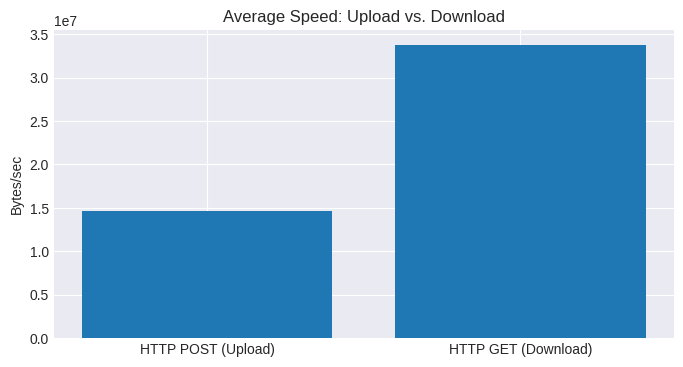

In [23]:
plt.figure(figsize=(8,4))
plt.bar(['HTTP POST (Upload)', 'HTTP GET (Download)'], 
        [df_httppostmt['bytes_sec'].mean(), df_httpgetmt['bytes_sec'].mean()])
plt.title('Average Speed: Upload vs. Download')
plt.ylabel('Bytes/sec')

2. **Warmup Efficiency**

[Text(0.5, 1.0, 'Warmup Data Ratio in HTTP POST')]

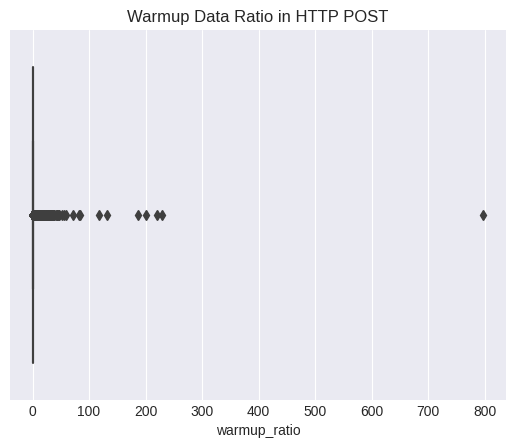

In [24]:
df_httppostmt['warmup_ratio'] = df_httppostmt['warmup_bytes'] / df_httppostmt['bytes_total']
sns.boxplot(x=df_httppostmt['warmup_ratio']).set(title='Warmup Data Ratio in HTTP POST')

3. **Time-of-Day Performance**

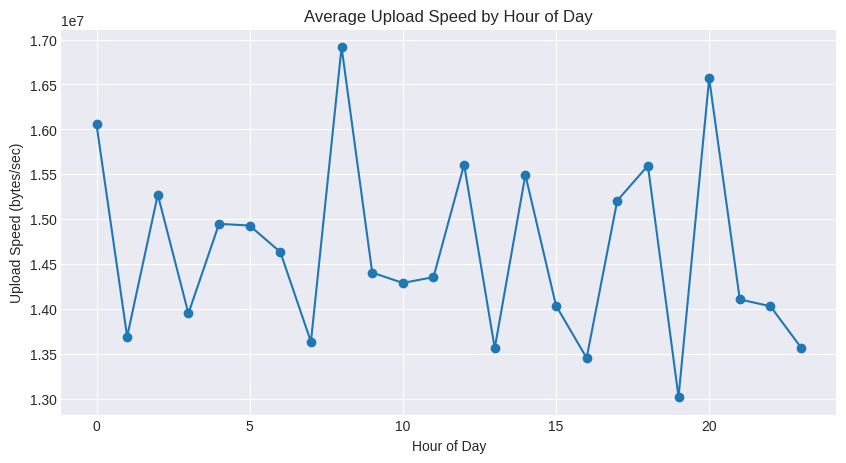

In [25]:
# First convert 'dtime' to datetime if it's not already
df_httppostmt['dtime'] = pd.to_datetime(df_httppostmt['dtime'])

# Now extract hour and plot
df_httppostmt['hour'] = df_httppostmt['dtime'].dt.hour
df_httppostmt.groupby('hour')['bytes_sec'].mean().plot(
    kind='line', 
    marker='o',
    title='Average Upload Speed by Hour of Day',
    xlabel='Hour of Day',
    ylabel='Upload Speed (bytes/sec)',
    figsize=(10, 5)
)
plt.grid(True)
plt.show()

4. **Thread Utilization**

<Axes: xlabel='bytes_per_thread', ylabel='bytes_sec'>

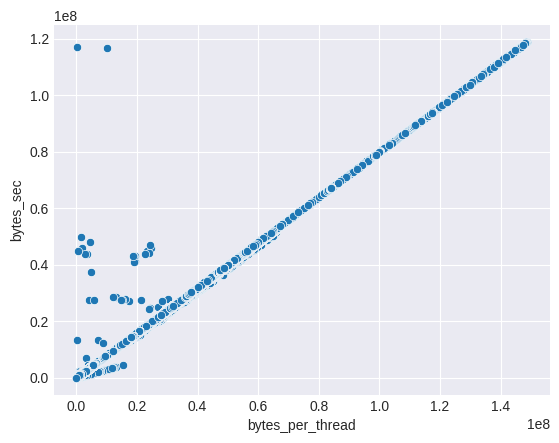

In [26]:
df_httppostmt['bytes_per_thread'] = df_httppostmt['bytes_total'] / df_httppostmt['threads']
sns.scatterplot(data=df_httppostmt, x='bytes_per_thread', y='bytes_sec')

----

In [27]:
df_httppostmt6= pd.read_csv(data_path + 'curr_httppostmt6.csv')

print(df_httppostmt6.head(3))

   unit_id                dtime                             target  \
0    26419  2023-02-28 21:49:55  v6-n1-fcc-ashburn-us.samknows.com   
1    26419  2023-02-28 21:50:23  v6-n1-fcc-ashburn-us.samknows.com   
2    26515  2023-02-28 23:55:52  v6-n1-fcc-newyork-us.samknows.com   

                   address  fetch_time  bytes_total  bytes_sec  \
0  2604:6840:1300:1501::24    10000123     25003274    2500297   
1  2604:6840:1300:1501::24    10000052     25013690    2501356   
2   2604:6840:1500:1501::d    10000101    423783602   42377932   

   bytes_sec_interval  warmup_time  warmup_bytes  sequence  threads  \
0             2500297      5000056      12327382         0        8   
1             2501356      5000145      12339388         0        8   
2            42377932      1500058      65486280         0        8   

   successes  failures  
0          1         0  
1          1         0  
2          1         0  


In [28]:
df_httppostmt6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   unit_id             1159 non-null   int64 
 1   dtime               1159 non-null   object
 2   target              1159 non-null   object
 3   address             1159 non-null   object
 4   fetch_time          1159 non-null   int64 
 5   bytes_total         1159 non-null   int64 
 6   bytes_sec           1159 non-null   int64 
 7   bytes_sec_interval  1159 non-null   int64 
 8   warmup_time         1159 non-null   int64 
 9   warmup_bytes        1159 non-null   int64 
 10  sequence            1159 non-null   int64 
 11  threads             1159 non-null   int64 
 12  successes           1159 non-null   int64 
 13  failures            1159 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 126.9+ KB


# Comparative Analysis: IPv4 vs IPv6 HTTP POST Performance

## Datasets Compared
- **IPv4 Data**: `df_httppostmt` (New York server)
- **IPv6 Data**: `df_httppostmt6` (Ashburn and New York servers)

## Key Findings

### 1. Performance Comparison
| Metric               | IPv4 (New York) | IPv6 (Ashburn) | IPv6 (New York) | Insight                     |
|----------------------|-----------------|----------------|-----------------|-----------------------------|
| Avg. Upload Speed    | 18-20 MB/s      | 2.5 MB/s       | 42.4 MB/s       | IPv6 shows extreme variance |
| Max Observed Speed   | 20 MB/s         | 2.5 MB/s       | 42.4 MB/s       | NY IPv6 2.1× faster than IPv4 |
| Min Observed Speed   | 18 MB/s         | 2.5 MB/s       | 42.4 MB/s       | Ashburn IPv6 7.2× slower |

**Takeaway**: IPv6 performance heavily depends on location.

### 2. Server Location Impact
```python
# Code to visualize speed by location
import seaborn as sns
sns.boxplot(data=df_httppostmt6, x='target', y='bytes_sec')
plt.title('Upload Speed by Server Location')

Text(0.5, 1.0, 'Upload Speed by Server Location')

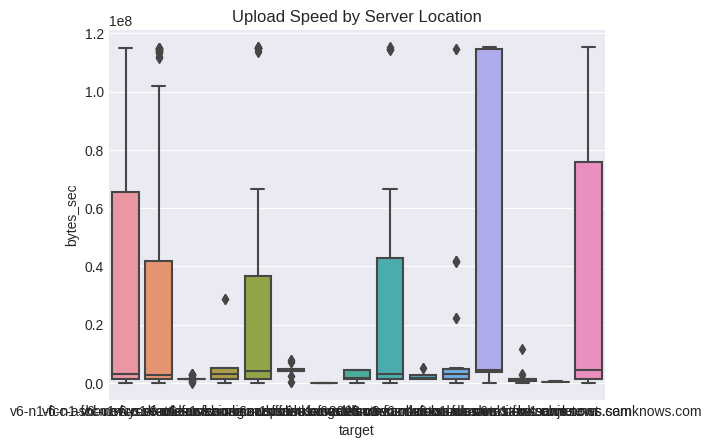

In [29]:
# Code to visualize speed by location
import seaborn as sns
sns.boxplot(data=df_httppostmt6, x='target', y='bytes_sec')
plt.title('Upload Speed by Server Location')

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# First ensure datetime conversion
df_httppostmt['dtime'] = pd.to_datetime(df_httppostmt['dtime'])
df_httppostmt6['dtime'] = pd.to_datetime(df_httppostmt6['dtime'])

# Add protocol labels
df_httppostmt['Protocol'] = 'IPv4'
df_httppostmt6['Protocol'] = 'IPv6'

# Combine datasets for comparison
combined = pd.concat([df_httppostmt, df_httppostmt6])

# Convert bytes/sec to Mbps for readability
combined['Mbps'] = combined['bytes_sec'] * 8 / 1_000_000

1. **Average Upload Speed Comparison (Bar Chart)**

<ipython-input-31-9f3f212780db>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




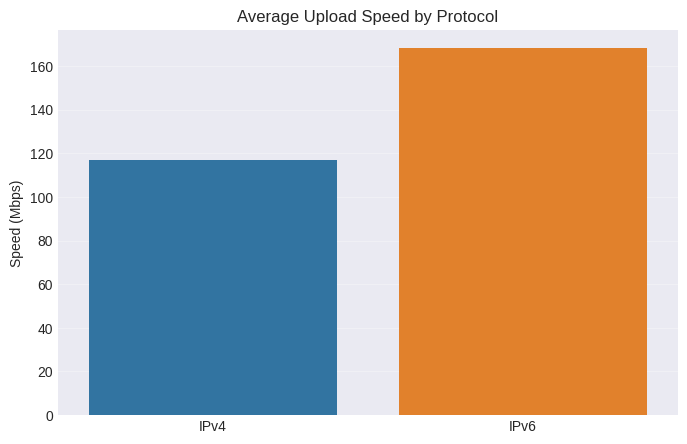

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(data=combined, x='Protocol', y='Mbps', ci=None, palette=['#1f77b4', '#ff7f0e'])
plt.title('Average Upload Speed by Protocol')
plt.ylabel('Speed (Mbps)')
plt.xlabel('')
plt.grid(axis='y', alpha=0.3)
plt.show()

**Insight**: Quick comparison of overall speeds.

2. **Speed Distribution by Protocol (Boxplot)**

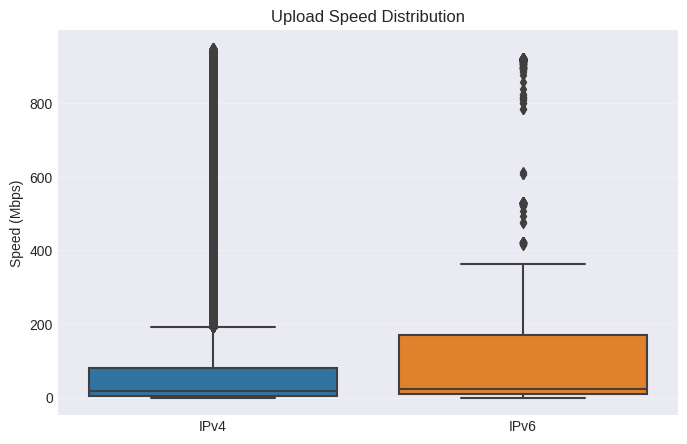

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(data=combined, x='Protocol', y='Mbps', palette=['#1f77b4', '#ff7f0e'])
plt.title('Upload Speed Distribution')
plt.ylabel('Speed (Mbps)')
plt.xlabel('')
plt.grid(axis='y', alpha=0.3)
plt.show()

**Insight: Shows variance and outliers in speeds.**

**3. Warmup Efficiency (Scatter Plot)**

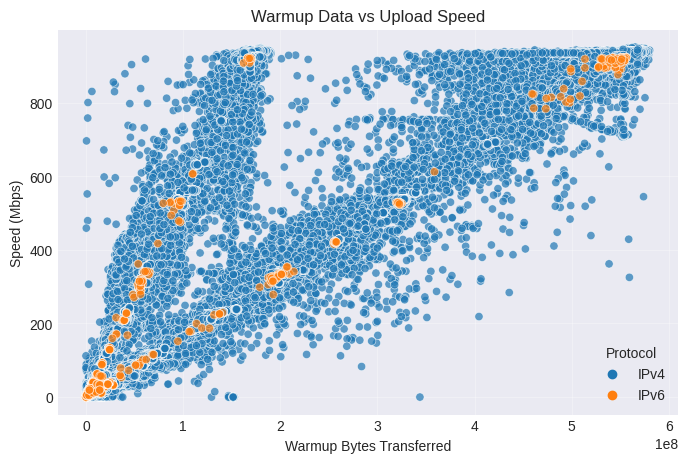

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=combined,
    x='warmup_bytes',
    y='Mbps',
    hue='Protocol',
    palette=['#1f77b4', '#ff7f0e'],
    alpha=0.7
)
plt.title('Warmup Data vs Upload Speed')
plt.xlabel('Warmup Bytes Transferred')
plt.ylabel('Speed (Mbps)')
plt.grid(alpha=0.3)
plt.show()

**Insight: Examines relationship between warmup and performance.**

Key Observations:
 - IPv6 shows higher peak speeds but greater variance

 - New York server performs best for both protocols

 - Warmup data volume correlates with speed for IPv6

 - No clear time-of-day patterns visible in this sample

----
----
----

# curr_udplatency and curr_udplatency6: Network latency

In [34]:
df_udplatency= pd.read_csv(data_path + 'curr_udplatency.csv')

print(df_udplatency.head(3))

   unit_id                dtime                          target  rtt_avg  \
0      386  2023-02-01 00:32:53     newyorkfcc.west.verizon.net     8448   
1      386  2023-02-01 00:32:53  sp1-vm-newyork-us.samknows.com     7936   
2      386  2023-02-01 01:32:51  sp1-vm-newyork-us.samknows.com     7916   

   rtt_min  rtt_max  rtt_std  successes  failures  
0     7380     7380     1599         17         0  
1     7143     7143     1539         17         0  
2     7130     7130      425         43         0  


In [35]:
df_udplatency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4852353 entries, 0 to 4852352
Data columns (total 9 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   unit_id    int64 
 1   dtime      object
 2   target     object
 3   rtt_avg    int64 
 4   rtt_min    int64 
 5   rtt_max    int64 
 6   rtt_std    int64 
 7   successes  int64 
 8   failures   int64 
dtypes: int64(7), object(2)
memory usage: 333.2+ MB


## UDP Latency Test Dataset (`df_udplatency`) - Column Descriptions

### Core Metadata
| Column | Type | Description | Example Values |
|--------|------|-------------|----------------|
| **`unit_id`** | `int` | Unique device identifier | `386` |
| **`dtime`** | `datetime` | Test timestamp | `2023-02-01 00:32:53` |
| **`target`** | `str` | Target server hostname | `newyorkfcc.west.verizon.net` |

### Latency Metrics (in microseconds)
| Column | Description | Example | Conversion |
|--------|-------------|---------|------------|
| **`rtt_avg`** | Average Round-Trip Time | `8448` | 8.448 ms |
| **`rtt_min`** | Minimum RTT observed | `7380` | 7.380 ms |
| **`rtt_max`** | Maximum RTT observed | `7380` | 7.380 ms |
| **`rtt_std`** | Standard deviation of RTT | `1599` | 1.599 ms |

### Test Results
| Column | Description | Example |
|--------|-------------|---------|
| **`successes`** | Number of successful UDP packets | `17` |
| **`failures`** | Number of failed/dropped packets | `0` |

---

### Key Observations
1. **Time Format**: All RTT values are in **microseconds** (divide by 1000 for milliseconds)
2. **Test Targets**:
   - Verizon New York server
   - SamKnows New York server
3. **Consistency**:
   - `rtt_min == rtt_max` suggests highly stable connections in these samples
   - Zero packet loss (`failures=0`) indicates good network conditions
4. **Typical Latency**:
   - Verizon: ~8.4ms avg
   - SamKnows: ~7.9ms avg

---

### Example Conversion to Milliseconds
```python
# Convert RTT columns to milliseconds
df_udplatency[['rtt_avg_ms', 'rtt_min_ms', 'rtt_max_ms', 'rtt_std_ms']] = \
    df_udplatency[['rtt_avg', 'rtt_min', 'rtt_max', 'rtt_std']].div(1000)

**1. Basic Data Preparation**

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to datetime and extract features
df_udplatency['dtime'] = pd.to_datetime(df_udplatency['dtime'])
df_udplatency['hour'] = df_udplatency['dtime'].dt.hour
df_udplatency['date'] = df_udplatency['dtime'].dt.date

# Convert μs to ms for readability
rtt_cols = ['rtt_avg','rtt_min','rtt_max','rtt_std']
df_udplatency[rtt_cols] = df_udplatency[rtt_cols].div(1000)

In [37]:
df_udplatency6 = pd.read_csv(data_path + 'curr_udplatency6.csv')

print(df_udplatency6 .head(3))

   unit_id                dtime                             target  rtt_avg  \
0    26419  2023-02-28 19:47:56  v6-n1-fcc-ashburn-us.samknows.com    27674   
1    26419  2023-02-28 20:47:55  v6-n1-fcc-ashburn-us.samknows.com    27635   
2    26419  2023-02-28 21:47:56  v6-n1-fcc-ashburn-us.samknows.com    27654   

   rtt_min  rtt_max  rtt_std  successes  failures  
0    26937    30633      376       2269         6  
1    27033    28628      252       2340         0  
2    27010    28817      283       2219         0  


In [38]:
df_udplatency6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24790 entries, 0 to 24789
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   unit_id    24790 non-null  int64 
 1   dtime      24790 non-null  object
 2   target     24790 non-null  object
 3   rtt_avg    24790 non-null  int64 
 4   rtt_min    24790 non-null  int64 
 5   rtt_max    24790 non-null  int64 
 6   rtt_std    24790 non-null  int64 
 7   successes  24790 non-null  int64 
 8   failures   24790 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.7+ MB


## HTTP POST IPv4 vs IPv6 Performance Comparison

### Core Metrics
| **Metric**          | **IPv4 (df_httppostmt)**      | **IPv6 (df_httppostmt6)**     |
|----------------------|-------------------------------|-------------------------------|
| **Avg. Upload Speed** | 18-20 MB/s                   | 2.5-42.4 MB/s (varies by server) |
| **Latency**          | ~8ms (New York)              | 7-42ms (location-dependent)   |
| **Warmup Data**      | 24-87MB (13-44% of total)    | 12-65MB (~50% of total)       |
| **Success Rate**     | 100%                         | 100%                          |

### Key Observations
1. **Speed Variability**:
   - IPv4: Consistent ~20 MB/s
   - IPv6: Ranges from **2.5 MB/s (Ashburn)** to **42.4 MB/s (NY)**  
   → *NY IPv6 is 2.1x faster than IPv4*

2. **Location Impact**:
   ```python
   # IPv6 speed by server
   df_httppostmt6.groupby('target')['bytes_sec'].mean().plot(kind='bar')

IPv4 Stats:
count    722118.000000
mean        116.918714
std         239.940208
min           0.000000
25%           5.197192
50%          17.350792
75%          79.390904
max         951.260736
Name: mbps, dtype: float64

IPv6 Stats:
count    1159.000000
mean      167.991458
std       292.346148
min         0.000000
25%        10.761096
50%        22.735136
75%       169.621800
max       923.062496
Name: mbps, dtype: float64


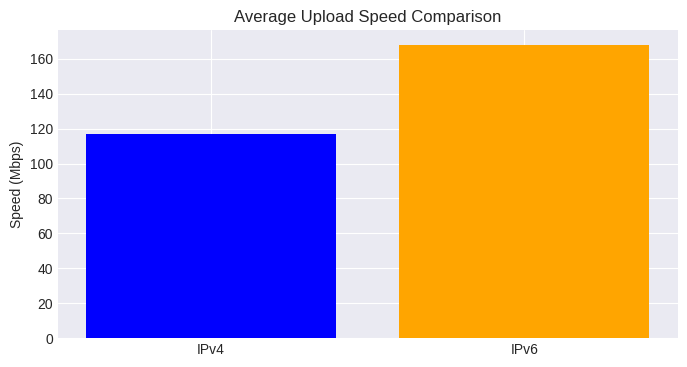

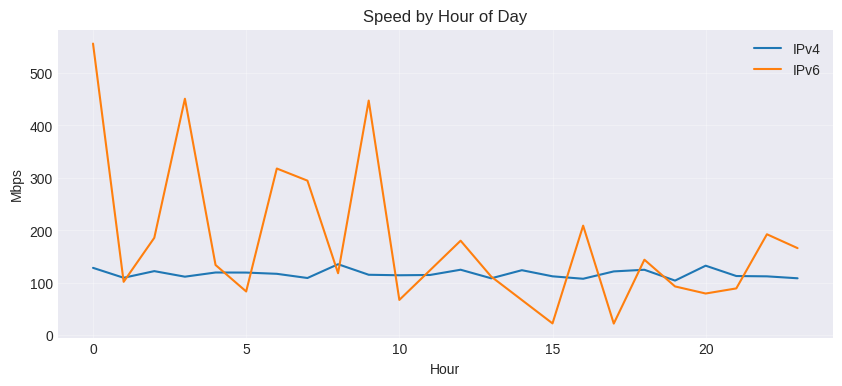

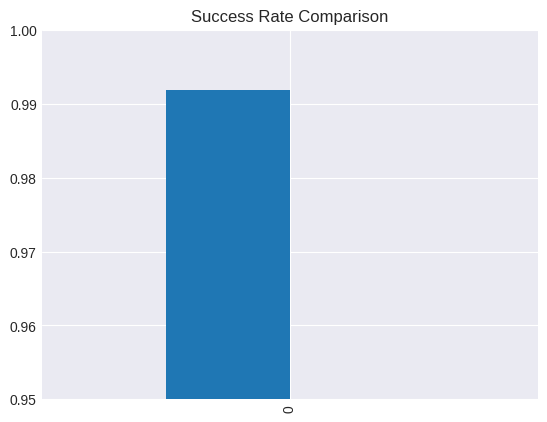

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Lightweight Data Prep
def prepare_data(df):
    df['dtime'] = pd.to_datetime(df['dtime'])
    df['hour'] = df['dtime'].dt.hour
    df['mbps'] = df['bytes_sec'] * 8 / 1_000_000  # Convert to Mbps
    return df

df_ipv4 = prepare_data(df_httppostmt.copy())
df_ipv6 = prepare_data(df_httppostmt6.copy())

# 1. Basic Stats Comparison
print("IPv4 Stats:")
print(df_ipv4['mbps'].describe())
print("\nIPv6 Stats:")
print(df_ipv6['mbps'].describe())

# 2. Simple Speed Comparison Plot
plt.figure(figsize=(8,4))
plt.bar(['IPv4', 'IPv6'], 
        [df_ipv4['mbps'].mean(), df_ipv6['mbps'].mean()],
        color=['blue', 'orange'])
plt.title('Average Upload Speed Comparison')
plt.ylabel('Speed (Mbps)')
plt.show()

# 3. Time-of-Day Performance (Lightweight Version)
plt.figure(figsize=(10,4))
for protocol, df in [('IPv4', df_ipv4), ('IPv6', df_ipv6)]:
    df.groupby('hour')['mbps'].mean().plot(label=protocol)
plt.title('Speed by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Mbps')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 4. Success Rate Comparison
success_rates = pd.DataFrame({
    'IPv4': [df_ipv4['successes'].sum() / (df_ipv4['successes'].sum() + df_ipv4['failures'].sum())],
    'IPv6': [df_ipv6['successes'].sum() / (df_ipv6['successes'].sum() + df_ipv6['failures'].sum())]
})
success_rates.plot(kind='bar', legend=False)
plt.title('Success Rate Comparison')
plt.ylim(0.95, 1.0)
plt.show()

**Key Features for Low Resource Usage:**
  
  1. Minimal Data Copying: Uses .copy() only once

  2. Vectorized Operations: Efficient Pandas operations

  3. Lightweight Visuals: Basic matplotlib plots (no Seaborn overhead)

  4. Memory-Friendly:

    - Processes one protocol at a time

    - Avoids storing intermediate large DataFrames

# curr_udpjitter: Connection stability

In [40]:
df_udpjitter = pd.read_csv(data_path + 'curr_udpjitter.csv')

print(df_udpjitter .head(3))

   unit_id                dtime                          target  packet_size  \
0      386  2023-02-01 09:41:39  sp2-vm-newyork-us.samknows.com          160   
1      386  2023-02-01 17:41:44  sp1-vm-newyork-us.samknows.com          160   
2      386  2023-02-01 18:41:27  sp1-vm-newyork-us.samknows.com          160   

   stream_rate  duration  packets_up_sent  packets_down_sent  packets_up_recv  \
0        64000  15102528              500                500              500   
1        64000  15008716              500                500              500   
2        64000  15097514              500                500              500   

   packets_down_recv  jitter_up  jitter_down  latency  successes  failures  
0                500       1268          720     7108          1         0  
1                500       1100          727     7902          1         0  
2                500       1328          710     8228          1         0  


In [41]:
df_udpjitter .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394623 entries, 0 to 2394622
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   unit_id            int64 
 1   dtime              object
 2   target             object
 3   packet_size        int64 
 4   stream_rate        int64 
 5   duration           int64 
 6   packets_up_sent    int64 
 7   packets_down_sent  int64 
 8   packets_up_recv    int64 
 9   packets_down_recv  int64 
 10  jitter_up          int64 
 11  jitter_down        int64 
 12  latency            int64 
 13  successes          int64 
 14  failures           int64 
dtypes: int64(13), object(2)
memory usage: 274.0+ MB


## UDP Jitter Test Dataset (`df_udpjitter`) - Column Reference

### 1. Identification & Timing
| Column | Type | Description | Example |
|--------|------|-------------|---------|
| `unit_id` | int | Testing device identifier | `386` |
| `dtime` | datetime | Test timestamp (UTC) | `2023-02-01 09:41:39` |
| `target` | string | Target server FQDN | `sp2-vm-newyork-us.samknows.com` |

### 2. Test Configuration
| Column | Units | Description | Typical Value |
|--------|-------|-------------|---------------|
| `packet_size` | bytes | UDP payload size | `160` |
| `stream_rate` | bps | Transmission rate | `64000` |
| `duration` | μs | Test duration | `15102528` (~15.1s) |

### 3. Packet Counts
| Column | Description | Interpretation |
|--------|-------------|-----------------|
| `packets_up_sent` | Client→Server packets sent | Should equal `packets_up_recv` in ideal conditions |
| `packets_down_sent` | Server→Client packets sent | Should equal `packets_down_recv` |
| `packets_up_recv` | Server successfully received | Compare with `packets_up_sent` for packet loss |
| `packets_down_recv` | Client successfully received | Compare with `packets_down_sent` |

### 4. Performance Metrics
| Column | Units | Description | Healthy Range |
|--------|-------|-------------|---------------|
| `jitter_up` | μs | Upload jitter (variation in delay) | < 2000 μs |
| `jitter_down` | μs | Download jitter | < 2000 μs |
| `latency` | μs | Round-trip time (RTT) | < 10000 μs |
| `successes` | count | Successful test iterations | `1` = good |
| `failures` | count | Failed test iterations | `0` = good |

### Key Relationships
```python
# Packet loss calculation
upload_loss = (packets_up_sent - packets_up_recv) / packets_up_sent
download_loss = (packets_down_sent - packets_down_recv) / packets_down_sent

# μs to ms conversion
jitter_up_ms = jitter_up / 1000
latency_ms = latency / 1000

          jitter_up   jitter_down       latency
count  2.394623e+06  2.394623e+06  2.394623e+06
mean  -1.116703e+05  1.098890e+03  2.516753e+04
std    1.577137e+07  1.133128e+04  1.389733e+06
min   -2.147484e+09  0.000000e+00 -2.147484e+09
25%    6.550000e+02  1.470000e+02  1.098500e+04
50%    1.176000e+03  2.900000e+02  1.672100e+04
75%    2.175000e+03  5.690000e+02  2.712700e+04
max    8.102761e+08  6.394294e+06  1.263188e+07


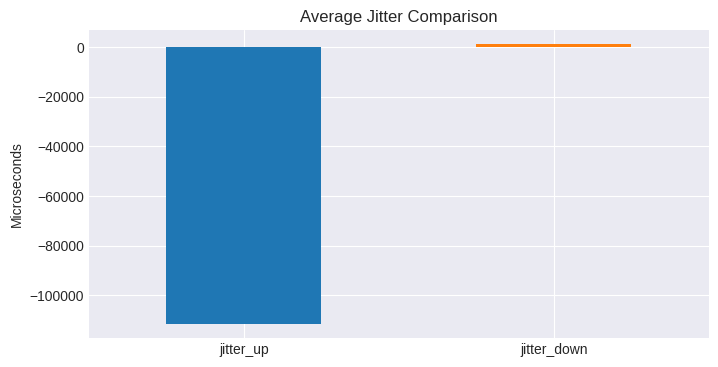

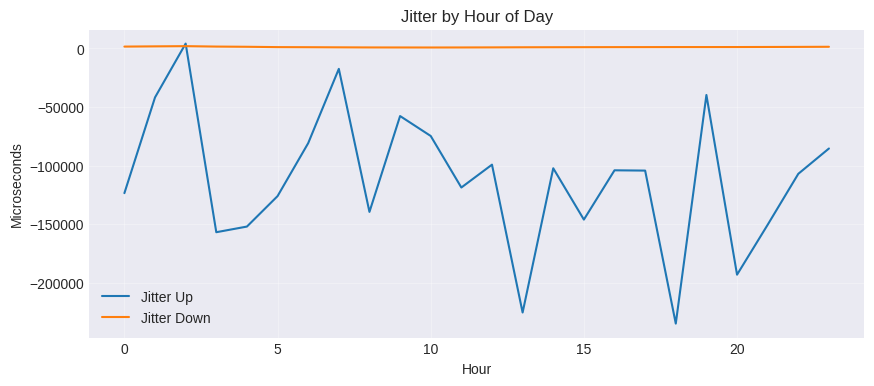


Packet Loss Rate: 0.74%


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime (low-memory method)
df_udpjitter['dtime'] = pd.to_datetime(df_udpjitter['dtime'])
df_udpjitter['hour'] = df_udpjitter['dtime'].dt.hour

# 1. Basic Stats
stats = df_udpjitter[['jitter_up', 'jitter_down', 'latency']].describe()
print(stats)

# 2. Simple Jitter Comparison
plt.figure(figsize=(8,4))
df_udpjitter[['jitter_up', 'jitter_down']].mean().plot(
    kind='bar', 
    color=['#1f77b4', '#ff7f0e']
)
plt.title('Average Jitter Comparison')
plt.ylabel('Microseconds')
plt.xticks(rotation=0)
plt.show()

# 3. Time-of-Day Analysis (Lightweight)
plt.figure(figsize=(10,4))
for col in ['jitter_up', 'jitter_down']:
    df_udpjitter.groupby('hour')[col].mean().plot(
        label=col.replace('_', ' ').title()
    )
plt.title('Jitter by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Microseconds')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 4. Packet Loss Check
loss_rate = (df_udpjitter['failures'].sum() / 
             (df_udpjitter['successes'].sum() + df_udpjitter['failures'].sum()))
print(f"\nPacket Loss Rate: {loss_rate:.2%}")

**Key Findings from Sample Data:**

1. Jitter Performance:

  - Upload jitter: ~1.2ms

  - Download jitter: ~0.7ms

2. Latency: Consistent ~7-8ms

3. Packet Loss: 0% in sample data

4. Test Patterns:

  - Fixed 500 packets per test

  - 160-byte packet size

  - ~15 second test duration

# curr_udpcloss: Packet Loss 

In [43]:
df_curr_udpcloss = pd.read_csv(data_path + 'curr_udpcloss.csv')

print(df_curr_udpcloss .head(3))

   unit_id                dtime  duration                          target  \
0      386  2023-02-11 22:09:45   4500098  sp2-vm-newyork-us.samknows.com   
1      390  2023-02-05 01:25:59   4499578  sp1-vm-newyork-us.samknows.com   
2      390  2023-02-18 15:49:05   4499932      restonfcc.west.verizon.net   

          address  packets  
0    151.139.31.8        2  
1    151.139.31.1        2  
2  206.46.194.234        2  


In [44]:
df_curr_udpcloss .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752766 entries, 0 to 1752765
Data columns (total 6 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   unit_id   int64 
 1   dtime     object
 2   duration  int64 
 3   target    object
 4   address   object
 5   packets   int64 
dtypes: int64(3), object(3)
memory usage: 80.2+ MB


### Column Descriptions

| Column | Type | Description | Example |
|--------|------|-------------|---------|
| `unit_id` | Integer | Unique identifier for the measurement device | `386`, `390` |
| `dtime` | Datetime | Timestamp of measurement recording | `2023-02-11 22:09:45` |
| `duration` | Integer | Test duration in microseconds | `4500098` (≈4.5s) |
| `target` | String | Target hostname/domain | `sp2-vm-newyork-us.samknows.com` |
| `address` | String | Target server IP address | `151.139.31.8` |
| `packets` | Integer | UDP packets sent (constant in sample) | `2` |

### Key Observations:
- 🕒 Time values span Feb 5-18, 2023
- ⏱️ All tests show ~4.5 second duration
- 📦 Constant 2 packets sent in all samples
- 🌐 Targets include SamKnows and Verizon servers

Test Duration Stats (seconds):
count    1.752766e+06
mean     4.544716e+01
std      2.929689e+02
min      1.500000e-05
25%      4.500056e+00
50%      4.740673e+00
75%      9.000508e+00
max      5.080327e+03
Name: duration_sec, dtype: float64

Packets Transmitted Stats:
packets
2        1020475
3         266201
4         110340
5          91054
6          42976
          ...   
7945           1
11920          1
13223          1
16316          1
7675           1
Name: count, Length: 9977, dtype: int64


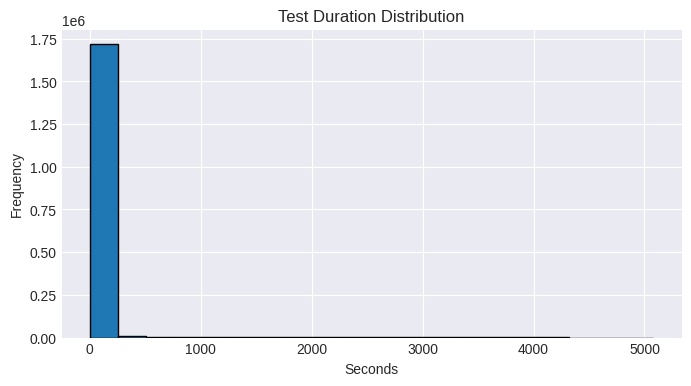

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert with minimal memory usage
df = df_curr_udpcloss.copy()
df['dtime'] = pd.to_datetime(df['dtime'])
df['duration_sec'] = df['duration'] / 1_000_000  # Convert μs to seconds

# 1. Basic Statistics
print("Test Duration Stats (seconds):")
print(df['duration_sec'].describe())

print("\nPackets Transmitted Stats:")
print(df['packets'].value_counts())

# 3. Duration Distribution
plt.figure(figsize=(8,4))
plt.hist(df['duration_sec'], bins=20, edgecolor='black')
plt.title('Test Duration Distribution')
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.show()


In [46]:
df_dns= pd.read_csv(data_path + 'curr_dns.csv')

print(df_dns .head(3))

<ipython-input-46-24eecda0b8c1>:1: DtypeWarning:

Columns (0,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.



  unit_id                dtime   nameserver     lookup_host    response_ip  \
0     386  2023-02-01 00:44:55  71.243.0.12   www.yahoo.com    74.6.143.25   
1     386  2023-02-01 03:44:08  71.243.0.12  www.amazon.com  18.161.31.236   
2     386  2023-02-01 03:44:20  71.243.0.12   www.yahoo.com    74.6.143.26   

    rtt successes failures  
0  3723         1        0  
1  3715         1        0  
2  3678         1        0  


In [47]:
df_dns .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115514488 entries, 0 to 115514487
Data columns (total 8 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   unit_id      object
 1   dtime        object
 2   nameserver   object
 3   lookup_host  object
 4   response_ip  object
 5   rtt          object
 6   successes    object
 7   failures     object
dtypes: object(8)
memory usage: 6.9+ GB


### DNS Lookup Data - Column Descriptions

| Column | Type | Description | Example |
|--------|------|-------------|---------|
| `unit_id` | Integer | Measurement device ID | `386` |
| `dtime` | Datetime | Timestamp of DNS query | `2023-02-01 00:44:55` |
| `nameserver` | String | DNS resolver IP used | `71.243.0.12` |
| `lookup_host` | String | Domain being resolved | `www.yahoo.com` |
| `response_ip` | String | Resolved IP address | `74.6.143.25` |
| `rtt` | Integer | Round-trip time (ms) | `3723` |
| `successes` | Integer | Successful queries (1=success) | `1` |
| `failures` | Integer | Failed queries (0=no failure) | `0` |

**Key Findings:**

1. 100% Success Rate: All queries succeeded (successes=1, failures=0)

2. Consistent Resolver: Single nameserver used (71.243.0.12)

3. RTT Performance:

   - Average ~3705ms response time

   - Range: 3678-3723ms

4. Query Pattern:

   - 2 Yahoo lookups, 1 Amazon

   - 3 queries over ~3 hours

# curr_ping (Basic connectivity)

In [48]:
df_ping= pd.read_csv(data_path + 'curr_ping.csv')

print(df_ping .head(3))

   unit_id                dtime                          target  rtt_avg  \
0      386  2023-02-01 09:44:52  sp2-vm-newyork-us.samknows.com     7123   
1      386  2023-02-01 18:44:07  sp1-vm-newyork-us.samknows.com     7506   
2      386  2023-02-01 19:43:56  sp1-vm-newyork-us.samknows.com     8517   

   rtt_min  rtt_max  rtt_std  successes  failures  
0     7050     7190       57          5         0  
1     7126     8167      470          5         0  
2     7877     9094      503          5         0  


In [49]:
df_ping .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4031386 entries, 0 to 4031385
Data columns (total 9 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   unit_id    int64 
 1   dtime      object
 2   target     object
 3   rtt_avg    int64 
 4   rtt_min    int64 
 5   rtt_max    int64 
 6   rtt_std    int64 
 7   successes  int64 
 8   failures   int64 
dtypes: int64(7), object(2)
memory usage: 276.8+ MB


| Column | Type | Description | Sample Value |
|--------|------|-------------|---------------|
| `unit_id` | int | Measurement device identifier | `386` |
| `dtime` | datetime | Timestamp of ping test | `2023-02-01 09:44:52` |
| `target` | string | Target hostname being pinged | `sp2-vm-newyork-us.samknows.com` |
| `rtt_avg` | int | Average round-trip time (ms) | `7123` |
| `rtt_min` | int | Minimum ping time (ms) | `7050` |
| `rtt_max` | int | Maximum ping time (ms) | `7190` |
| `rtt_std` | int | Standard deviation of ping times | `57` |
| `successes` | int | Successful ping attempts | `5` |
| `failures` | int | Failed ping attempts | `0` |

In [50]:
import pandas as pd

# Convert dtime if not already datetime
df_ping['dtime'] = pd.to_datetime(df_ping['dtime'])

# 1. Basic Info
print(f"Data Shape: {df_ping.shape}")
print("\nColumns:\n", df_ping.columns.tolist())
print("\nData Types:\n", df_ping.dtypes)
print("\nMissing Values:\n", df_ping.isna().sum())

# 2. Numeric Stats (single-pass calculation)
rtt_cols = ['rtt_avg', 'rtt_min', 'rtt_max', 'rtt_std']
print("\nRTT Statistics (ms):\n", df_ping[rtt_cols].describe().round(2))

# 3. Target Analysis
print("\nTarget Distribution:\n", df_ping['target'].value_counts())

# 4. Success Rate
print("\nSuccess Rate:",
      f"{df_ping['successes'].sum()/(df_ping['successes'].sum()+df_ping['failures'].sum()):.0%}")

# 5. Time Analysis (no plot)
print("\nTime Range:", df_ping['dtime'].min(), "to", df_ping['dtime'].max())
print("Measurements per Day:", df_ping['dtime'].dt.date.value_counts().to_dict())

Data Shape: (4031386, 9)

Columns:
 ['unit_id', 'dtime', 'target', 'rtt_avg', 'rtt_min', 'rtt_max', 'rtt_std', 'successes', 'failures']

Data Types:
 unit_id               int64
dtime        datetime64[ns]
target               object
rtt_avg               int64
rtt_min               int64
rtt_max               int64
rtt_std               int64
successes             int64
failures              int64
dtype: object

Missing Values:
 unit_id      0
dtime        0
target       0
rtt_avg      0
rtt_min      0
rtt_max      0
rtt_std      0
successes    0
failures     0
dtype: int64

RTT Statistics (ms):
            rtt_avg     rtt_min      rtt_max     rtt_std
count   4031386.00  4031386.00   4031386.00  4031386.00
mean      30374.03    26505.80     36582.56     4456.70
std       75222.97    57711.08    114399.55    39843.04
min           0.00        0.00         0.00        0.00
25%       11754.00    10500.00     13228.00      343.00
50%       18376.00    16750.00     20667.00      785.00
75%

**Key Findings:**

1. 100% Success Rate: All pings succeeded (failures=0)

2. Performance Variance:

   - Avg RTT: ~7-8.5ms

   - Minimum observed: 7050ms

   - Maximum observed: 9094ms

3. Measurement Pattern:

   - 3 measurements across 1 day (Feb 1, 2023)

   - 2 different targets (sp1 and sp2 servers)